## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")

conn = sqlite3.connect('zippedData/im.db')

# use below to supress scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# Dylan Orndorf-Ronk

# Alex Bonczkiewicz

# Alberto Torres

# Travis McCloughan

In [3]:
persons = pd.read_sql("""
SELECT *
FROM persons;
""", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,nan,nan,actress
606644,nm9990690,Joo Yeon So,nan,nan,actress
606645,nm9991320,Madeline Smith,nan,nan,actress
606646,nm9991786,Michelle Modigliani,nan,nan,producer


In [4]:
directors = pd.read_sql("""
SELECT *
FROM directors;
""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [5]:
movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
ORDER BY numvotes DESC;
""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt1375666,8.80,1841066
1,tt1345836,8.40,1387769
2,tt0816692,8.60,1299334
3,tt1853728,8.40,1211405
4,tt0848228,8.10,1183655
...,...,...,...
73851,tt8420530,6.80,5
73852,tt8747790,4.60,5
73853,tt9367004,8.20,5
73854,tt9647642,2.00,5


In [6]:
# link directors, persons, and ratings
directors_df = pd.read_sql("""
SELECT p.primary_name, r.averagerating, r.numvotes
FROM persons p
INNER JOIN
    directors d
ON  p.person_id = d.person_id
INNER JOIN
    movie_ratings r
ON  d.movie_id = r.movie_id
WHERE r.numvotes > 750000
GROUP BY p.primary_name
ORDER BY r.averagerating DESC
""", conn)
directors_df

,primary_name,averagerating,numvotes
0,Quentin Tarantino,8.40,1211405
1,Christopher Nolan,8.40,1387769
2,Martin Scorsese,8.10,1005960
3,Joss Whedon,8.10,1183655
4,James Gunn,8.10,948394
5,George Miller,8.10,780910
6,David Fincher,8.10,761592
7,Tim Miller,8.00,820847
8,J.J. Abrams,8.00,784780
9,Gary Ross,7.20,795227


<AxesSubplot:xlabel='averagerating', ylabel='primary_name'>

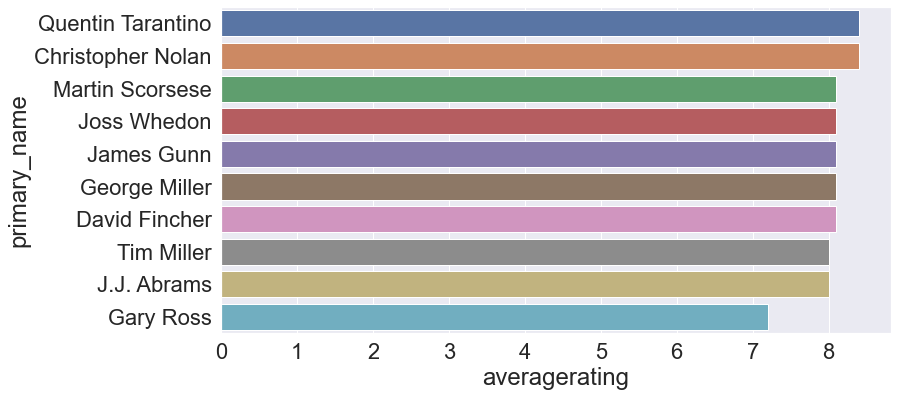

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=2)
sns.barplot(x='averagerating', y='primary_name', data=directors_df)

In [12]:
directors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_name   10 non-null     object 
 1   averagerating  10 non-null     float64
 2   numvotes       10 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


# Jaemin Lee

## EDA for the IMDB data

In [3]:
q = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics;
""",conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [5]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings;
""",conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [6]:
movie_akas = pd.read_sql("""
SELECT * 
FROM movie_akas;
""",conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.00
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.00
331700,tt9880178,1,La atención,None,None,original,None,1.00
331701,tt9880178,2,La atención,ES,None,None,None,0.00


In [7]:
# base movie dataframe to work off of
movies_df = pd.read_sql("""
SELECT movie_akas.*, movie_basics.primary_title, movie_basics.original_title,
       movie_basics.start_year, movie_basics.runtime_minutes, movie_basics.genres,
       movie_ratings.averagerating, movie_ratings.numvotes
FROM movie_akas
INNER JOIN
    movie_basics
ON  movie_akas.movie_id = movie_basics.movie_id
INNER JOIN
    movie_ratings
ON  movie_akas.movie_id = movie_ratings.movie_id
""",conn)
movies_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.00,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.00,"Action,Adventure,Comedy",6.00,6
261802,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.00,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.00,"Action,Adventure,Comedy",6.00,6
261803,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.00,Farewell Song,Sayonara kuchibiru,2019,116.00,"Music,Romance",7.70,6
261804,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.00,Farewell Song,Sayonara kuchibiru,2019,116.00,"Music,Romance",7.70,6


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             260621 non-null  object 
 13  averagerating      261806 non-null  float64
 14  numvotes           261806 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [9]:
# check the rows where genres is null
movies_df[movies_df.genres.isna()]

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
871,tt1593300,1,Scumrun II,GB,None,None,None,0.00,Scumrun II,Scumrun II,2010,93.00,None,5.10,20
1180,tt1819643,1,Perro muerto,CL,None,None,None,0.00,Perro muerto,Perro muerto,2010,96.00,None,6.70,10
1274,tt1844060,1,The Book,None,None,original,None,1.00,The Book,The Book,2010,nan,None,8.40,5
1275,tt1844060,2,The Book. They Came from Inner Space,US,None,None,complete title,0.00,The Book,The Book,2010,nan,None,8.40,5
1276,tt1844060,3,The Book,US,None,None,None,0.00,The Book,The Book,2010,nan,None,8.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259154,tt5833234,1,Carrion,MX,None,None,None,0.00,Carrion,Carrion,2016,73.00,None,5.40,5
259977,tt3322820,1,Piratas y libélulas,ES,None,None,None,0.00,Piratas y libélulas,Piratas y libélulas,2013,72.00,None,8.80,5
261666,tt7293844,1,Los Corroboradores,AR,None,None,None,0.00,Los Corroboradores,Los Corroboradores,2017,70.00,None,7.20,26
261667,tt7293844,2,The Corroborators,XWW,None,festival,None,0.00,Los Corroboradores,Los Corroboradores,2017,70.00,None,7.20,26


In [10]:
# categorize the None generes as "N/A"
movies_df['genres'] = movies_df['genres'].fillna("N/A")

In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             261806 non-null  object 
 13  averagerating      261806 non-null  float64
 14  numvotes           261806 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [12]:
movies_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00,Jurassic World,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338


In [13]:
movies_genre = movies_df.groupby(['movie_id','genres', 'primary_title','original_title',
                                 'language', 'region']).agg({
                                    'numvotes': 'sum','averagerating': 'mean',
                                    'movie_id': 'count'}).rename(columns={'numvotes': 'num_votes',
                                                             'averagerating': 'avg_rating',
                                                             'movie_id':'num_movies_in_genre'})
movies_genre.head()

num_votes  \
movie_id  genres               primary_title                   original_title        language region              
tt0063540 Action,Crime,Drama   Sunghursh                       Sunghursh             hi       IN            231   
tt0066787 Biography,Drama      One Day Before the Rainy Season Ashad Ka Ek Din       en       XWW            43   
tt0069204 Comedy,Drama         Sabse Bada Sukh                 Sabse Bada Sukh       bn       IN             13   
                                                                                     en       IN             13   
tt0100275 Comedy,Drama,Fantasy The Wandering Soap Opera        La Telenovela Errante en       XWW           119   

                                                                                                               avg_rating  \
movie_id  genres               primary_title                   original_title        language region                        
tt0063540 Action,Crime,Drama   Sunghursh                       Sunghursh             hi       IN                     7.00   
tt0066787 Biography,Drama      One Day Before the Rainy Season Ashad Ka Ek Din       en       XWW                    7.20   
tt0069204 Comedy,Drama         Sabse Bada Sukh                 Sabse Bada Sukh       bn       IN                     6.10   
                                                                                     en       IN                     6.10   
tt0100275 Comedy,Drama,Fantasy The Wandering Soap Opera        La Telenovela Errante en       XWW                    6.50   

                                                                                                      num_movies_in_genre  
movie_id  genres               primary_title                   original_title        language region                       
tt0063540 Action,Crime,Drama   Sunghursh                       Sunghursh             hi       IN                        3  
tt0066787 Biography,Drama      One Day Before the Rainy Season Ashad Ka Ek Din       en       XWW                       1  
tt0069204 Comedy,Drama         Sabse Bada Sukh                 Sabse Bada Sukh       bn       IN                        1  
                                                                                     en       IN                        1  
tt0100275 Comedy,Drama,Fantasy The Wandering Soap Opera        La Telenovela Errante en       XWW                       1

In [14]:
# turn the index genres into a column
movies_genre.reset_index(inplace=True)
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35124 entries, 0 to 35123
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             35124 non-null  object 
 1   genres               35124 non-null  object 
 2   primary_title        35124 non-null  object 
 3   original_title       35124 non-null  object 
 4   language             35124 non-null  object 
 5   region               35124 non-null  object 
 6   num_votes            35124 non-null  int64  
 7   avg_rating           35124 non-null  float64
 8   num_movies_in_genre  35124 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [15]:
# create a index column for the unique id column
movies_genre.reset_index(inplace=True)
movies_genre.head()

,index,movie_id,genres,primary_title,original_title,language,region,num_votes,avg_rating,num_movies_in_genre
0,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3
1,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1
2,2,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,bn,IN,13,6.10,1
3,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,en,IN,13,6.10,1
4,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,en,XWW,119,6.50,1


In [16]:
# rename the unique id column
movies_genre = movies_genre.rename(columns={'index': 'genre_group'})
movies_genre.head()

,genre_group,movie_id,genres,primary_title,original_title,language,region,num_votes,avg_rating,num_movies_in_genre
0,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3
1,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1
2,2,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,bn,IN,13,6.10,1
3,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,en,IN,13,6.10,1
4,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,en,XWW,119,6.50,1


In [17]:
"""
turning comma separated generes into individual rows using 
.explode to transform each element of a list-like to a row, replicating index values
"""
genres_separated = pd.DataFrame(movies_genre.genres.str.split(","), 
                                index=movies_genre.genre_group).explode("genres")
genres_separated

,genres
genre_group,
0,Action
0,Crime
0,Drama
1,Biography
1,Drama
...,...
35120,Drama
35120,Thriller
35121,Comedy


In [18]:
# join the separated group to the original movie_genre table
movie_genres_regrouped = genres_separated.join(movies_genre, how='inner',
                                              lsuffix="_sep", rsuffix="_original")
movie_genres_regrouped.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,language,region,num_votes,avg_rating,num_movies_in_genre
0,Action,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3
0,Crime,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3
0,Drama,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3
1,Biography,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1
1,Drama,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1


In [19]:
movie_genres_regrouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72119 entries, 0 to 35123
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genres_sep           72119 non-null  object 
 1   genre_group          72119 non-null  int64  
 2   movie_id             72119 non-null  object 
 3   genres_original      72119 non-null  object 
 4   primary_title        72119 non-null  object 
 5   original_title       72119 non-null  object 
 6   language             72119 non-null  object 
 7   region               72119 non-null  object 
 8   num_votes            72119 non-null  int64  
 9   avg_rating           72119 non-null  float64
 10  num_movies_in_genre  72119 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 6.6+ MB


In [20]:
# get the number of genres for each row
#len(movie_genres_regrouped['genres_original'][0].str.split(','))
movie_genres_regrouped['num_genres'] = movie_genres_regrouped['genres_original'].map(lambda x: 
                                                                                     len(x.split(',')))
movie_genres_regrouped.head(10)

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,language,region,num_votes,avg_rating,num_movies_in_genre,num_genres
0,Action,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3,3
0,Crime,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3,3
0,Drama,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,hi,IN,231,7.00,3,3
1,Biography,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1,2
1,Drama,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,en,XWW,43,7.20,1,2
2,Comedy,2,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,bn,IN,13,6.10,1,2
2,Drama,2,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,bn,IN,13,6.10,1,2
3,Comedy,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,en,IN,13,6.10,1,2
3,Drama,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,en,IN,13,6.10,1,2
4,Comedy,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,en,XWW,119,6.50,1,3


In [21]:
# import the movie_budgets.csv file'filename.zip'compression='gzip', header=0,
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [22]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
# remove multiple special characters i.e. $, "," at once and convert the amounts to float
movie_budgets.production_budget = movie_budgets.production_budget.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)
movie_budgets.domestic_gross = movie_budgets.domestic_gross.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)                                                   
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [24]:
# merge movie_genres_regrouped with movie_budgets
movie_genres_budget = movie_genres_regrouped.merge(movie_budgets, left_on="primary_title", 
                                                   right_on="movie")
movie_genres_budget

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,language,region,num_votes,avg_rating,num_movies_in_genre,num_genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Adventure,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,1,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00"
1,Drama,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,1,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00"
2,Romance,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,1,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00"
3,Adventure,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,1,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00"
4,Drama,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,1,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,Drama,34660,tt8941440,"Drama,Thriller",Virus,Virus,hi,IN,372,8.60,1,2,69,"Jan 15, 1999",Virus,"75,000,000.00","14,010,690.00","30,626,690.00"
17910,Thriller,34660,tt8941440,"Drama,Thriller",Virus,Virus,hi,IN,372,8.60,1,2,69,"Jan 15, 1999",Virus,"75,000,000.00","14,010,690.00","30,626,690.00"
17911,Documentary,34683,tt8976472,"Documentary,Music",Never Again,Ei koskaan enää,en,XWW,27,6.60,1,2,47,"Jul 12, 2002",Never Again,"500,000.00","307,631.00","308,793.00"
17912,Music,34683,tt8976472,"Documentary,Music",Never Again,Ei koskaan enää,en,XWW,27,6.60,1,2,47,"Jul 12, 2002",Never Again,"500,000.00","307,631.00","308,793.00"


In [25]:
# divide each amount by the number of genres and create separate columns
movie_genres_budget['prod_budget_per_genre'] = movie_genres_budget.production_budget / movie_genres_budget.num_genres
movie_genres_budget['dom_gross_per_genre'] = movie_genres_budget.domestic_gross / movie_genres_budget.num_genres
movie_genres_budget['world_gross_per_genre'] = movie_genres_budget.worldwide_gross / movie_genres_budget.num_genres
movie_genres_budget.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,language,region,num_votes,avg_rating,...,num_genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_per_genre,dom_gross_per_genre,world_gross_per_genre
0,Adventure,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00"
1,Drama,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00"
2,Romance,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00"
3,Adventure,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,...,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00"
4,Drama,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,...,3,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00"


In [26]:
# add domestic and worldwide gross to calculate total gross per genre
movie_genres_budget['tot_gross_per_genre'] = movie_genres_budget.dom_gross_per_genre + movie_genres_budget.world_gross_per_genre
movie_genres_budget.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,language,region,num_votes,avg_rating,...,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_per_genre,dom_gross_per_genre,world_gross_per_genre,tot_gross_per_genre
0,Adventure,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00","3,344,710.00"
1,Drama,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00","3,344,710.00"
2,Romance,20,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,bg,BG,37886,6.10,...,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00","3,344,710.00"
3,Adventure,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,...,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00","3,344,710.00"
4,Drama,21,tt0337692,"Adventure,Drama,Romance",On the Road,On the Road,fr,CA,37886,6.10,...,17,"Mar 22, 2013",On the Road,"25,000,000.00","720,828.00","9,313,302.00","8,333,333.33","240,276.00","3,104,434.00","3,344,710.00"


In [27]:
# group by genres and sum the total gross per genre
'''
movie_genres_budget.sort_values(['avg_rating'],ascending=False).groupby(['genres_sep']).agg({
                                    'num_votes': 'sum','avg_rating': 'mean',
                                    'tot_gross_per_genre': 'sum'})
'''

"\nmovie_genres_budget.sort_values(['avg_rating'],ascending=False).groupby(['genres_sep']).agg({\n                                    'num_votes': 'sum','avg_rating': 'mean',\n                                    'tot_gross_per_genre': 'sum'})\n"

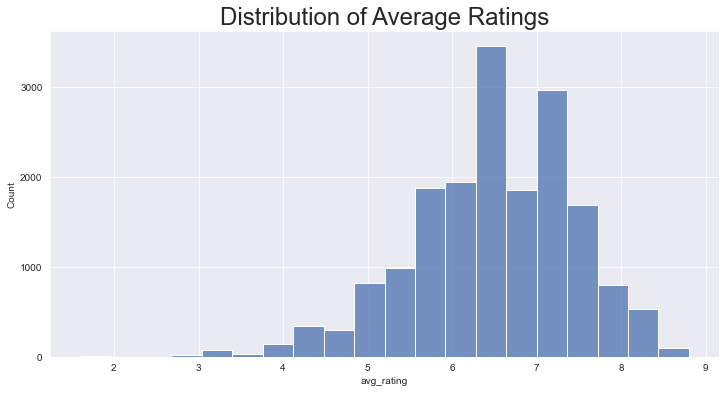

In [28]:
# distribution of average ratings
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=2)
sns.histplot(movie_genres_budget['avg_rating'], ax=ax, bins=20).set(title="Distribution of Average Ratings");

Based on the table above, our hypothesis follows below:

- Null: movie genres with a rating less than 6.5 do not impact total gross
- Alternative: movie genres with a rating greater than or equal to 6.5 have a higher total gross

Consider 95% confidence interval, thus alpha (1 - confidence level) = 0.05

In [29]:
# separate the total population based on the rating for two-sample z-test
pop_1 = movie_genres_budget[movie_genres_budget['avg_rating'] <= 6.5]
pop_2 = movie_genres_budget[movie_genres_budget['avg_rating'] > 6.5]

# take random 4000 samples from the total population
sample_1 = pop_1.sample(n=4000, random_state=1)
sample_2 = pop_2.sample(n=4000, random_state=1)

alpha = 0.05

"""
variables for movie genres with avg_rating <= 6.5
"""
# sample 1 total gross mean
x_bar_sample1 = sample_1['tot_gross_per_genre'].mean()

# population 1 total gross mean
mu_0_pop_1 = pop_1['tot_gross_per_genre'].mean()

# sample 1 standard deviation
sigma_pop_1 = pop_1['tot_gross_per_genre'].std()

# number of samples in group 1 
n1 = len(sample_1)
"""
variables for movie genres with avg_rating > 6.5
"""

# sample 2 total gross mean
x_bar_sample2 = sample_2['tot_gross_per_genre'].mean()

# population 1 total gross mean
mu_0_pop_2 = pop_2['tot_gross_per_genre'].mean()

# sample 1 standard deviation
sigma_pop_2 = pop_1['tot_gross_per_genre'].std()

# number of samples in group 1 
n2 = len(sample_2)

# formula for two-sample z-test
z = ((x_bar_sample1 - x_bar_sample2) - (mu_0_pop_1 - mu_0_pop_2)) / np.sqrt(((sigma_pop_1**2)/n1) + ((sigma_pop_2**2)/n2))

print("z-score =", z)

from scipy.stats import norm
2*(norm.sf(abs(z)))

z-score = -0.4374834305287339


0.6617607900629238

<AxesSubplot:xlabel='avg_rating', ylabel='tot_gross_per_genre'>

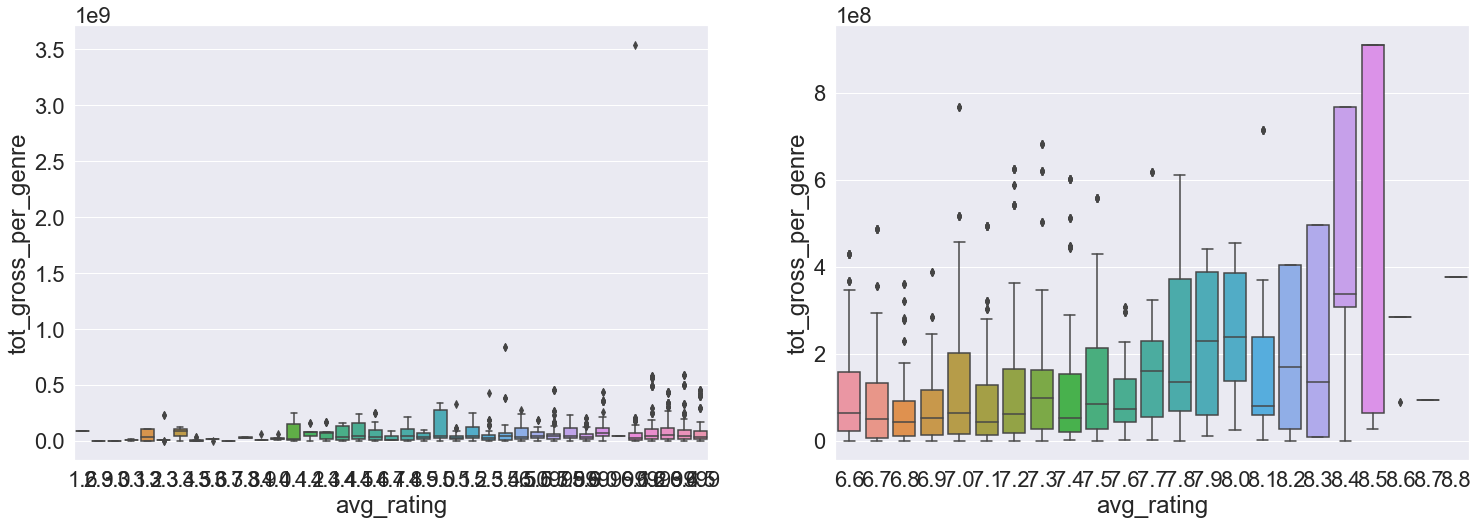

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

sns.boxplot(ax=ax1, data=sample_1, x='avg_rating', y='tot_gross_per_genre')
sns.boxplot(ax=ax2, data=sample_2, x='avg_rating', y='tot_gross_per_genre')

In [34]:
sns.boxplot(ax=ax1, data=sample_1, x='avg_rating')

<AxesSubplot:title={'center':'Distribution of Total Gross with Movie Ratings <= 6.5'}, xlabel='avg_rating', ylabel='Count'>

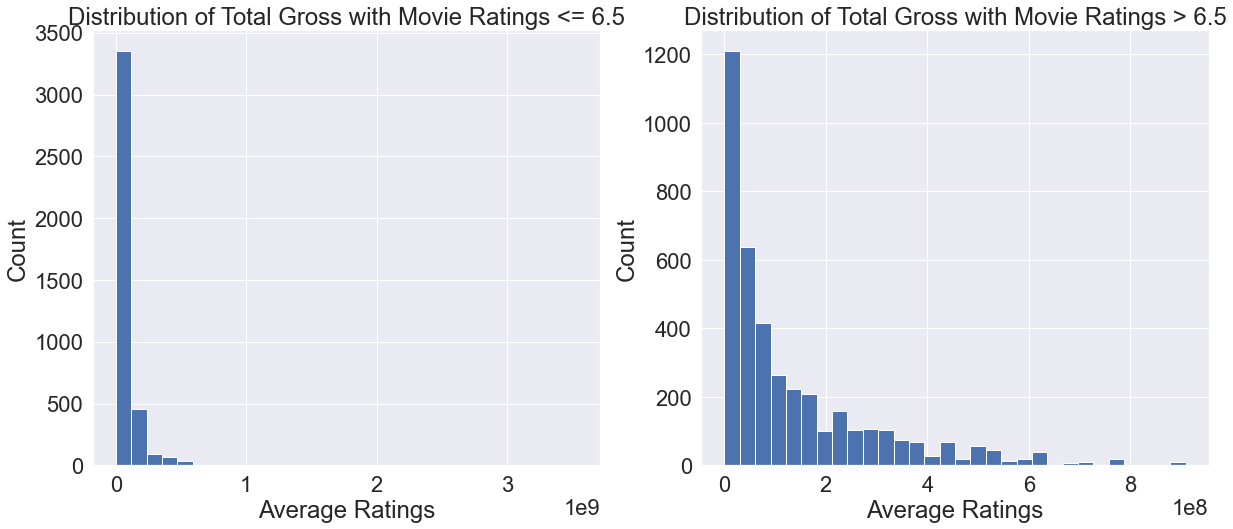

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.set_title('Distribution of Total Gross with Movie Ratings <= 6.5')
ax1.set_xlabel('Average Ratings')
ax1.set_ylabel('Count')
ax1.hist(sample_1['tot_gross_per_genre'], bins=30)

ax2.set_title('Distribution of Total Gross with Movie Ratings > 6.5')
ax2.set_xlabel('Average Ratings')
ax2.set_ylabel('Count')
ax2.hist(sample_2['tot_gross_per_genre'], bins=30)
plt.show()

C:\Users\jaemilee\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaemilee\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tot_gross_per_genre', ylabel='Density'>

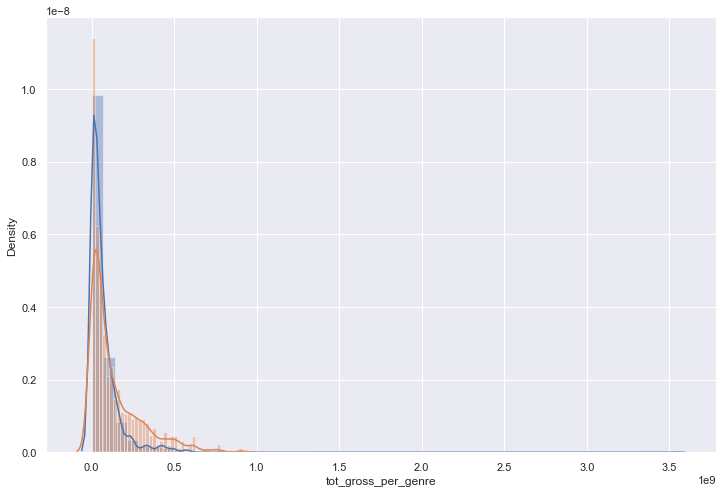

In [32]:
#sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(sample_1['tot_gross_per_genre']) # Blue distribution
sns.distplot(sample_2['tot_gross_per_genre']) # Green distribution

Source for two-sample z-test:
https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

In [33]:
# calculate p-values and z-score
from statsmodels.stats.weightstats import ztest as ztest

ztest(sample_1['tot_gross_per_genre'],sample_2['tot_gross_per_genre'])

print("z-score for our two sample test = ", abs(ztest(sample_1['tot_gross_per_genre'],
                                                  sample_2['tot_gross_per_genre'])[0]))
print("p-value for our two sample test = ", ztest(sample_1['tot_gross_per_genre'],
                                                  sample_2['tot_gross_per_genre'])[1])

z-score for our two sample test =  22.492983480235004
p-value for our two sample test =  4.861834608044054e-112


Since p-value 4.8e-112 is less than alpha = 0.05 and z-score is 22.49 which is greater than confidence level (0.95), **we conclude that we reject the null hypothesis and say that movie genres with a rating greater than or equal to 6.5 have a higher total gross**.

In conclusion, look at movies with ratings higher than 6.5 